# Part 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
pd.set_option('display.max_colwidth', -1)

train_data = pd.read_csv("train.csv")
train_data.head()

,Sentiment,Tweet
0,neutral,"@united 877 from amsterdam to ewr, 02.27.2015, 737-300."
1,negative,@united IT-problems with the link? #3thparty
2,positive,@united -today the staff @ MSP took customer service to a new level. My father passed away last night &amp; you helped me get home today! Thanks
3,negative,@AmericanAir but have been yet to receive assistance from one of your agents in securing a new connection. Many will now miss work tomorrow.
4,negative,@SouthwestAir you won't let me change my reservation online so now I'm just wasting my time. http://t.co/mHA3xXaeD5


In [2]:
data = pd.read_csv('stop_words.txt', sep=" ", header=None)
stop_words = data.loc[:,0].values
train_data['tweet_filter'] = train_data['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
train_data['tweet_filter'] = train_data['tweet_filter'].str.lower()
train_data['tweet_filter'] = train_data['tweet_filter'].str.replace('[^\w\s]','')
train_data['tweet_filter'] = train_data['tweet_filter'].str.replace('_','')
train_data

,Sentiment,Tweet,tweet_filter
0,neutral,"@united 877 from amsterdam to ewr, 02.27.2015, 737-300.",united 877 amsterdam ewr 02272015 737300
1,negative,@united IT-problems with the link? #3thparty,united itproblems link 3thparty
2,positive,@united -today the staff @ MSP took customer service to a new level. My father passed away last night &amp; you helped me get home today! Thanks,united today staff msp took customer service new level my father passed away last night amp helped get home today thanks
3,negative,@AmericanAir but have been yet to receive assistance from one of your agents in securing a new connection. Many will now miss work tomorrow.,americanair yet receive assistance one agents securing new connection many miss work tomorrow
4,negative,@SouthwestAir you won't let me change my reservation online so now I'm just wasting my time. http://t.co/mHA3xXaeD5,southwestair let change reservation online im wasting time httptcomha3xxaed5
...,...,...,...
11675,negative,@AmericanAir That what I hoped - contacted them 3 wks ago about this but they have not responded and still issued in US funds. #frustrated,americanair that i hoped contacted 3 wks ago responded still issued us funds frustrated
11676,negative,@SouthwestAir 20 minutes on hold waiting is ridiculous......,southwestair 20 minutes hold waiting ridiculous
11677,neutral,@virginamerica may start service to Hawaii from #SanFrancisco this year http://t.co/yPo7nYpRZl #biztravel,virginamerica may start service hawaii sanfrancisco year httptcoypo7nyprzl biztravel
11678,negative,@AmericanAir She could even see that I had tried to make the transaction but wouldn't offer me the price I'd tried to purchase it at.,americanair she could even see i tried make transaction offer price id tried purchase at


In [3]:
train_data['tweet_filter'] = train_data['tweet_filter'].str.replace('\d+','')
train_data['tweet_filter'] = train_data['tweet_filter'].apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('http')]))
train_data

,Sentiment,Tweet,tweet_filter
0,neutral,"@united 877 from amsterdam to ewr, 02.27.2015, 737-300.",united amsterdam ewr
1,negative,@united IT-problems with the link? #3thparty,united itproblems link thparty
2,positive,@united -today the staff @ MSP took customer service to a new level. My father passed away last night &amp; you helped me get home today! Thanks,united today staff msp took customer service new level my father passed away last night amp helped get home today thanks
3,negative,@AmericanAir but have been yet to receive assistance from one of your agents in securing a new connection. Many will now miss work tomorrow.,americanair yet receive assistance one agents securing new connection many miss work tomorrow
4,negative,@SouthwestAir you won't let me change my reservation online so now I'm just wasting my time. http://t.co/mHA3xXaeD5,southwestair let change reservation online im wasting time
...,...,...,...
11675,negative,@AmericanAir That what I hoped - contacted them 3 wks ago about this but they have not responded and still issued in US funds. #frustrated,americanair that i hoped contacted wks ago responded still issued us funds frustrated
11676,negative,@SouthwestAir 20 minutes on hold waiting is ridiculous......,southwestair minutes hold waiting ridiculous
11677,neutral,@virginamerica may start service to Hawaii from #SanFrancisco this year http://t.co/yPo7nYpRZl #biztravel,virginamerica may start service hawaii sanfrancisco year biztravel
11678,negative,@AmericanAir She could even see that I had tried to make the transaction but wouldn't offer me the price I'd tried to purchase it at.,americanair she could even see i tried make transaction offer price id tried purchase at


In [7]:
bog = []
for tweet in train_data['tweet_filter']:
    for word in tweet.split():
        if word not in bog:
            bog.append(word)
# BOW_present = pd.DataFrame({}, columns=bog)
count = 0
zero_data = np.zeros(shape=(len(train_data['tweet_filter']),len(bog)))
BOW_present = pd.DataFrame(zero_data, columns=bog)
for tweet in train_data['tweet_filter']:
    for word in tweet.split():
        BOW_present.at[count,word] += 1
    count += 1
BOW_present

,united,amsterdam,ewr,itproblems,link,thparty,today,staff,msp,took,...,adventure,capeairs,rndtrp,djqkc,djimpact,fixthis,metars,thismosaicnothappy,bleh,biztravel
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
test_data = pd.read_csv("test.csv")
test_data.head()

,Sentiment,Tweet
0,neutral,@VirginAmerica to jump into the Dallas-Austin market - @Dallas_News http://t.co/EwwGi97gdx
1,positive,"@AmericanAir Chicago seen from seat 6A, AA 1620. So far a great ride! On to PDX! http://t.co/X4rsvAGIjN"
2,negative,@united you need a bag bouncer. Get it together
3,negative,"@JetBlue Hey Jetblue, you stranded an entire plane that was supposed to go to JFK and we are getting restless. Need better communication!"
4,negative,@USAirways Big fail on not having curbside baggage in Pittsburgh and you charge 30 dollars a bag!!


In [9]:
test_data['tweet_filter'] = test_data['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
test_data['tweet_filter'] = test_data['tweet_filter'].str.lower()
test_data['tweet_filter'] = test_data['tweet_filter'].str.replace('[^\w\s]','')
test_data['tweet_filter'] = test_data['tweet_filter'].str.replace('\d+','')
test_data['tweet_filter'] = test_data['tweet_filter'].str.replace('_','')
count = 0
zero_data = np.zeros(shape=(len(test_data['tweet_filter']),len(bog)))
BOW_test = pd.DataFrame(zero_data, columns=bog)
for tweet in test_data['tweet_filter']:
    for word in tweet.split():
        if word in bog:
            BOW_test.at[count,word] += 1
    count += 1

In [10]:
dist = sp.spatial.distance.cdist(BOW_present, BOW_test, 'euclidean')

In [11]:
dist.shape

(11680, 2921)

In [12]:
def most_frequent(List): 
    counter = 0
    num = List[0] 
        
    for i in List: 
        curr_frequency = List.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 
    
    return num
all_outputs = test_data['Sentiment'].unique()
confusion_matrix= np.zeros((5,len(all_outputs),len(all_outputs)), dtype=int)
outputs = []
for i in range(0,len(all_outputs)):
    outputs.append(all_outputs[i])
k_array=[1,3,5,7,10]
accuracy = [0,0,0,0,0]
dist_transpose = dist.T
for k in range(0,len(k_array)):
    count = 0
    for test_row in dist_transpose:
        temp = np.argpartition(test_row,k_array[k])
        senti = []
        for i in range(0,k_array[k]):
            senti.append(train_data.loc[temp[i],'Sentiment'])
        var = most_frequent(senti)
        if test_data.loc[count,'Sentiment']==var:
            accuracy[k] +=1
            o = outputs.index(var)
            confusion_matrix[k][o][o] +=1
        else:
            o = outputs.index(var)
            l = outputs.index(test_data.loc[count,'Sentiment'])
            confusion_matrix[k][o][l] += 1
        count +=1
for i in range(0,5):
    print('for k = ',k_array[i],' accuracy = ', (accuracy[i]/2921)*100, '%')

for k =  1  accuracy =  49.36665525504964 %
for k =  3  accuracy =  49.263950701814444 %
for k =  5  accuracy =  48.13420061622732 %
for k =  7  accuracy =  46.66210201985621 %
for k =  10  accuracy =  44.29989729544677 %


for k =  1
accuracy =  49.36665525504964 %
Confusion Matrix:
 [[370 166 762]
 [141 249 249]
 [104  57 823]]
Precision: 0.5037024681484038
Recall: 0.5259714332398301
F1: 0.514596142994915 

for k =  3
accuracy =  49.263950701814444 %
Confusion Matrix:
 [[349 129 712]
 [159 285 317]
 [107  58 805]]
Precision: 0.4992271484911073
Recall: 0.5367415106095685
F1: 0.5173050969534866 

for k =  5
accuracy =  48.13420061622732 %
Confusion Matrix:
 [[361 130 732]
 [164 290 347]
 [ 90  52 755]]
Precision: 0.4996392584219294
Recall: 0.5376890445890948
F1: 0.5179663077162486 

for k =  7
accuracy =  46.66210201985621 %
Confusion Matrix:
 [[369 132 756]
 [161 294 378]
 [ 85  46 700]]
Precision: 0.49628528882696626
Recall: 0.5348535817483935
F1: 0.5148481390290862 

for k =  10
accuracy =  44.29989729544677 %
Confusion Matrix:
 [[377 142 808]
 [171 292 401]
 [ 67  38 625]]
Precision: 0.4927422730063183
Recall: 0.5241457889691182
F1: 0.507959129624578 



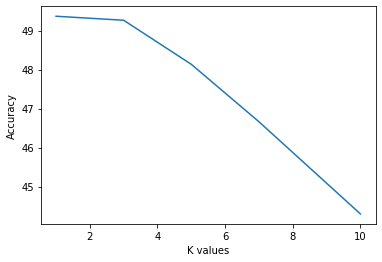

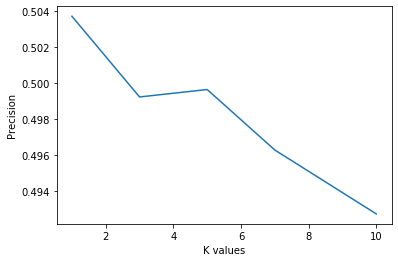

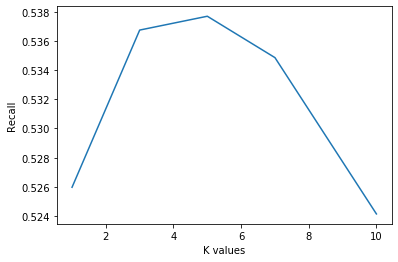

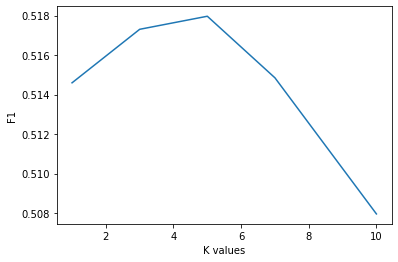

In [14]:
precision = []
recall = []
f1 = []
for i in range(0, len(k_array)):
    print("for k = ",k_array[i])
    print('accuracy = ', (accuracy[i]/2921)*100, '%')
    print("Confusion Matrix:\n", confusion_matrix[i])
    row_val = 0
    row_precision = 0
    for row in confusion_matrix[i]:
        row_precision += row[row_val]/row.sum()
        row_val +=1
    k_precision = row_precision/len(all_outputs)
    precision.append(k_precision)
    print("Precision:", k_precision)
    temp_matrix = confusion_matrix[i].T
    row_val = 0
    row_recall = 0
    for row in temp_matrix:
        row_recall += row[row_val]/row.sum()
        row_val +=1
    k_recall = row_recall/len(all_outputs)
    recall.append(k_recall)
    print("Recall:", k_recall)
    k_f1 = (2*k_recall*k_precision)/(k_recall+k_precision) 
    f1.append(k_f1)
    print("F1:", k_f1,"\n")
for i in range(0,len(accuracy)):
    accuracy[i] = (accuracy[i]/2921)*100
plt.plot(k_array,accuracy)
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.show()
plt.plot(k_array,precision)
plt.xlabel('K values')
plt.ylabel('Precision')
plt.show()
plt.plot(k_array,recall)
plt.xlabel('K values')
plt.ylabel('Recall')
plt.show()
plt.plot(k_array,f1)
plt.xlabel('K values')
plt.ylabel('F1')
plt.show()

# Part 2

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
k_array=[1,3,5,7,10]
precision_2 = []
recall_2 = []
f1_2 = []
accuracy_2 = []
reports_2 = []
confusion_mat_2 = []
for k in k_array:
    text_classifier = KNeighborsClassifier(n_neighbors=k)
    text_classifier.fit(BOW_present, train_data['Sentiment'])
    predictions = text_classifier.predict(BOW_test)
    print("for k=", k)
    con_mat = confusion_matrix(test_data['Sentiment'],predictions)
    confusion_mat_2.append(con_mat)
    print("Confusion Matrix: \n", con_mat)
    report = classification_report(test_data['Sentiment'],predictions) 
    reports_2.append(report)
    print(report)
    acc = accuracy_score(test_data['Sentiment'], predictions)
    accuracy_2.append(acc)
    print('Accuracy for {}nn'.format(k),acc)
    print('\n')

for k= 1
Confusion Matrix: 
 [[863 729 242]
 [117 367 131]
 [ 69 157 246]]
              precision    recall  f1-score   support

    negative       0.82      0.47      0.60      1834
     neutral       0.29      0.60      0.39       615
    positive       0.40      0.52      0.45       472

    accuracy                           0.51      2921
   macro avg       0.50      0.53      0.48      2921
weighted avg       0.64      0.51      0.53      2921

Accuracy for 1nn 0.5053064019171517


for k= 3
Confusion Matrix: 
 [[930 707 197]
 [145 354 116]
 [ 76 135 261]]
              precision    recall  f1-score   support

    negative       0.81      0.51      0.62      1834
     neutral       0.30      0.58      0.39       615
    positive       0.45      0.55      0.50       472

    accuracy                           0.53      2921
   macro avg       0.52      0.55      0.50      2921
weighted avg       0.64      0.53      0.55      2921

Accuracy for 3nn 0.5289284491612462


for k= 5
Con

for k =  1
accuracy =  50.53064019171517 %
Confusion Matrix:
 [[863 729 242]
 [117 367 131]
 [ 69 157 246]]
Precision: 0.5294968565178323
Recall: 0.5043335024725669
F1: 0.5166089424122483 

for k =  3
accuracy =  52.892844916124616 %
Confusion Matrix:
 [[930 707 197]
 [145 354 116]
 [ 76 135 261]]
Precision: 0.5452213964360962
Recall: 0.5195611681161155
F1: 0.5320820889537534 

for k =  5
accuracy =  51.96850393700787 %
Confusion Matrix:
 [[864 784 186]
 [119 401  95]
 [ 63 156 253]]
Precision: 0.5530502957146829
Recall: 0.5329390566085727
F1: 0.5428084579737985 

for k =  7
accuracy =  48.23690516946251 %
Confusion Matrix:
 [[751 850 233]
 [107 404 104]
 [ 51 167 254]]
Precision: 0.5348445404772698
Recall: 0.5134231594271736
F1: 0.5239149766786605 

for k =  10
accuracy =  45.3611776788771 %
Confusion Matrix:
 [[638 885 311]
 [ 75 420 120]
 [ 38 167 267]]
Precision: 0.5321594319717481
Recall: 0.5057938438849664
F1: 0.5186417749574841 



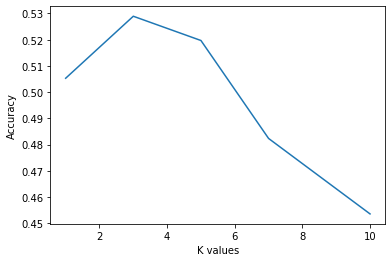

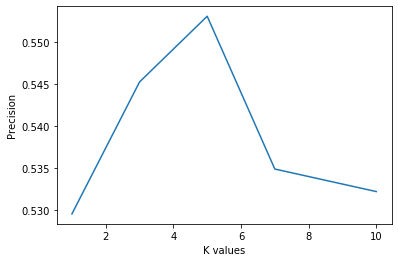

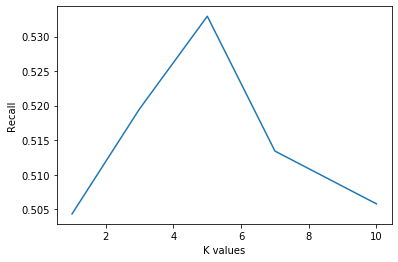

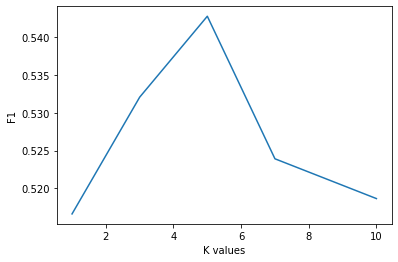

In [16]:
all_outputs = test_data['Sentiment'].unique()
for i in range(0, len(k_array)):
    print("for k = ",k_array[i])
    print('accuracy = ', accuracy_2[i]*100, '%')
    print("Confusion Matrix:\n", confusion_mat_2[i])
    row_val = 0
    row_precision = 0
    for row in confusion_mat_2[i]:
        row_precision += row[row_val]/row.sum()
        row_val +=1
    k_precision = row_precision/len(all_outputs)
    precision_2.append(k_precision)
    print("Precision:", k_precision)
    temp_matrix = confusion_mat_2[i].T
    row_val = 0
    row_recall = 0
    for row in temp_matrix:
        row_recall += row[row_val]/row.sum()
        row_val +=1
    k_recall = row_recall/len(all_outputs)
    recall_2.append(k_recall)
    print("Recall:", k_recall)
    k_f1 = (2*k_recall*k_precision)/(k_recall+k_precision) 
    f1_2.append(k_f1)
    print("F1:", k_f1,"\n")
plt.plot(k_array,accuracy_2)
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.show()
plt.plot(k_array,precision_2)
plt.xlabel('K values')
plt.ylabel('Precision')
plt.show()
plt.plot(k_array,recall_2)
plt.xlabel('K values')
plt.ylabel('Recall')
plt.show()
plt.plot(k_array,f1_2)
plt.xlabel('K values')
plt.ylabel('F1')
plt.show()

# Part 3 Using Part 1

In [17]:
from gensim.models import KeyedVectors
import numpy as np

In [18]:
word2vec = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)
def extract_features(text):
  words = [word for word in text.split() if word in word2vec.vocab]
  return np.mean(word2vec[words], axis=0)

In [19]:
train_embeddings = []
for tweet in train_data['tweet_filter']:
  text_embedding = extract_features(tweet)
  train_embeddings.append(text_embedding)

test_embeddings = []
for tweet in test_data['tweet_filter']:
  text_embedding = extract_features(tweet)
  test_embeddings.append(text_embedding)

In [20]:
dist_part3_1 = sp.spatial.distance.cdist(train_embeddings, test_embeddings, 'euclidean')
print(dist_part3_1.shape)
dist_part3_1_transpose = dist_part3_1.T

(11680, 2921)


In [21]:
def most_frequent(List): 
    counter = 0
    num = List[0] 
        
    for i in List: 
        curr_frequency = List.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 
    
    return num
k_array=[1,3,5,7,10]
accuracy_31 = [0,0,0,0,0]
all_outputs = test_data['Sentiment'].unique()
confusion_matrix_31 = np.zeros((5,len(all_outputs),len(all_outputs)), dtype=int)
outputs = []
for i in range(0,len(all_outputs)):
    outputs.append(all_outputs[i])
for k in range(0,5):
    count = 0
    for test_row in dist_part3_1_transpose:
        temp = np.argpartition(test_row,k_array[k])
        senti = []
        for i in range(0,k_array[k]):
            senti.append(train_data.loc[temp[i],'Sentiment'])
        var = most_frequent(senti)
        if test_data.loc[count,'Sentiment']==var:
            accuracy_31[k] +=1
            o = outputs.index(var)
            confusion_matrix_31[k][o][o] +=1
        else:
            o = outputs.index(var)
            l = outputs.index(test_data.loc[count,'Sentiment'])
            confusion_matrix_31[k][o][l] += 1
        count +=1
for i in range(0,5):
    print('for k = ',k_array[i],' accuracy = ', (accuracy_31[i]/2921)*100, '%')

for k =  1  accuracy =  69.70215679561794 %
for k =  3  accuracy =  72.33824032865456 %
for k =  5  accuracy =  73.77610407394728 %
for k =  7  accuracy =  73.4679904142417 %
for k =  10  accuracy =  73.05717220130093 %


for k =  1
accuracy =  69.70215679561794 %
Confusion Matrix:
 [[ 248   87  165]
 [  84  229  110]
 [ 283  156 1559]]
Precision: 0.6058838128909051
Recall: 0.579492016557598
F1: 0.5923941146920614 

for k =  3
accuracy =  72.33824032865456 %
Confusion Matrix:
 [[ 191   66   96]
 [  77  237   53]
 [ 347  169 1685]]
Precision: 0.6508047208655413
Recall: 0.5771481884874113
F1: 0.6117673777971239 

for k =  5
accuracy =  73.77610407394728 %
Confusion Matrix:
 [[ 172   49   70]
 [  43  245   26]
 [ 400  178 1738]]
Precision: 0.7072506160318239
Recall: 0.5821326637984048
F1: 0.6386211013033738 

for k =  7
accuracy =  73.4679904142417 %
Confusion Matrix:
 [[ 153   40   56]
 [  39  232   17]
 [ 423  200 1761]]
Precision: 0.7195626278417174
Recall: 0.5668340679303508
F1: 0.6341319327244964 

for k =  10
accuracy =  73.05717220130093 %
Confusion Matrix:
 [[ 127   32   33]
 [  38  221   15]
 [ 450  219 1786]]
Precision: 0.7318408615831107
Recall: 0.5495173676807467
F1: 0.6277077785646281 



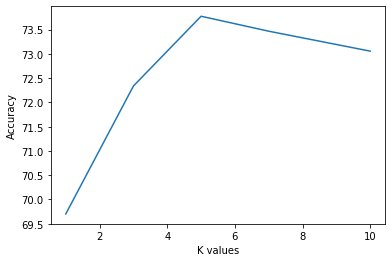

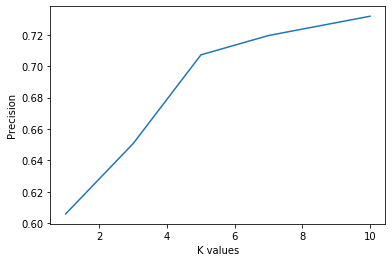

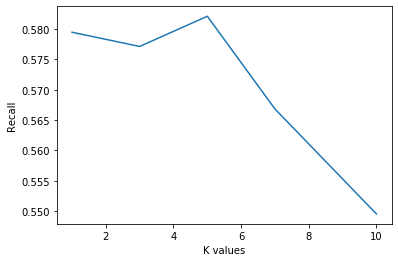

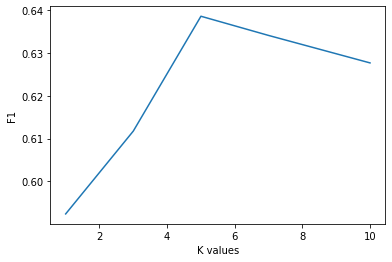

In [22]:
precision_31 = []
recall_31 = []
f1_31 = []
for i in range(0, len(k_array)):
    print("for k = ",k_array[i])
    print('accuracy = ', (accuracy_31[i]/2921)*100, '%')
    print("Confusion Matrix:\n", confusion_matrix_31[i])
    row_val = 0
    row_precision = 0
    for row in confusion_matrix_31[i]:
        row_precision += row[row_val]/row.sum()
        row_val +=1
    k_precision = row_precision/len(all_outputs)
    precision_31.append(k_precision)
    print("Precision:", k_precision)
    temp_matrix = confusion_matrix_31[i].T
    row_val = 0
    row_recall = 0
    for row in temp_matrix:
        row_recall += row[row_val]/row.sum()
        row_val +=1
    k_recall = row_recall/len(all_outputs)
    recall_31.append(k_recall)
    print("Recall:", k_recall)
    k_f1 = (2*k_recall*k_precision)/(k_recall+k_precision) 
    f1_31.append(k_f1)
    print("F1:", k_f1,"\n")
for i in range(0,len(accuracy_31)):
    accuracy_31[i] = (accuracy_31[i]/2921)*100
plt.plot(k_array,accuracy_31)
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.show()
plt.plot(k_array,precision_31)
plt.xlabel('K values')
plt.ylabel('Precision')
plt.show()
plt.plot(k_array,recall_31)
plt.xlabel('K values')
plt.ylabel('Recall')
plt.show()
plt.plot(k_array,f1_31)
plt.xlabel('K values')
plt.ylabel('F1')
plt.show()

# Part3 Using Part 2

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
k_array=[1,3,5,7,10]
precision_32 = []
recall_32 = []
f1_32 = []
accuracy_32 = []
reports_32 = []
confusion_mat_32 = []
for k in k_array:
    text_classifier_part3 = KNeighborsClassifier(n_neighbors=k)
    text_classifier_part3.fit(train_embeddings, train_data['Sentiment'])
    predictions_part3 = text_classifier_part3.predict(test_embeddings)
    print('----------------------- {} NN -----------------------'.format(k))
    print('\n')
    con_mat =confusion_matrix(test_data['Sentiment'],predictions_part3)
    confusion_mat_32.append(con_mat)
    print("Confusion Matrix:", con_mat)
    report = classification_report(test_data['Sentiment'],predictions_part3)
    reports_32.append(report)
    acc = accuracy_score(test_data['Sentiment'], predictions_part3)
    accuracy_32.append(acc)
    print('Accuracy for {}nn'.format(k),acc)
    print('\n')

----------------------- 1 NN -----------------------


Confusion Matrix: [[1560  163  111]
 [ 285  245   85]
 [ 156   83  233]]
Accuracy for 1nn 0.6977062649777473


----------------------- 3 NN -----------------------


Confusion Matrix: [[1719   73   42]
 [ 386  172   57]
 [ 199   47  226]]
Accuracy for 3nn 0.7247517973296816


----------------------- 5 NN -----------------------


Confusion Matrix: [[1761   58   15]
 [ 423  160   32]
 [ 204   47  221]]
Accuracy for 5nn 0.733310510099281


----------------------- 7 NN -----------------------


Confusion Matrix: [[1775   45   14]
 [ 442  140   33]
 [ 213   39  220]]
Accuracy for 7nn 0.7309140705237932


----------------------- 10 NN -----------------------


Confusion Matrix: [[1802   21   11]
 [ 472  110   33]
 [ 232   29  211]]
Accuracy for 10nn 0.7268058883943855




for k =  1
accuracy =  69.77062649777473 %
Confusion Matrix:
 [[1560  163  111]
 [ 285  245   85]
 [ 156   83  233]]
Precision: 0.5808726111446464
Recall: 0.6072384693623972
F1: 0.5937629924896958 

for k =  3
accuracy =  72.47517973296816 %
Confusion Matrix:
 [[1719   73   42]
 [ 386  172   57]
 [ 199   47  226]]
Precision: 0.5652612949895279
Recall: 0.6768398204250089
F1: 0.6160389820859868 

for k =  5
accuracy =  73.3310510099281 %
Confusion Matrix:
 [[1761   58   15]
 [ 423  160   32]
 [ 204   47  221]]
Precision: 0.5628597442888094
Recall: 0.7219458788356502
F1: 0.6325536959646855 

for k =  7
accuracy =  73.09140705237932 %
Confusion Matrix:
 [[1775   45   14]
 [ 442  140   33]
 [ 213   39  220]]
Precision: 0.5538579504605462
Recall: 0.726474237450101
F1: 0.628529901873531 

for k =  10
accuracy =  72.68058883943856 %
Confusion Matrix:
 [[1802   21   11]
 [ 472  110   33]
 [ 232   29  211]]
Precision: 0.5361491620895545
Recall: 0.7446750674198915
F1: 0.6234374775671947 



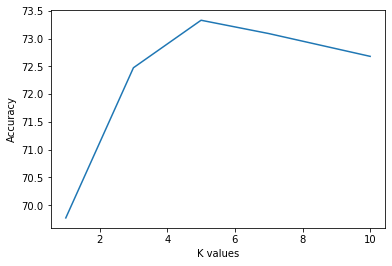

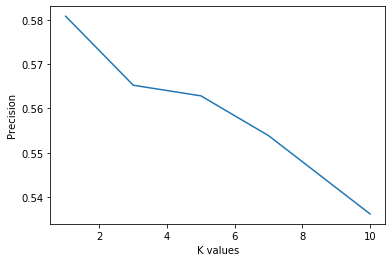

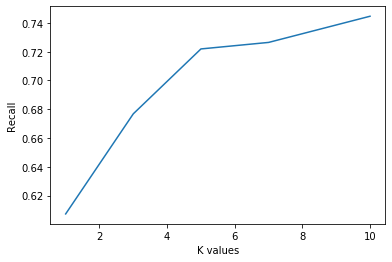

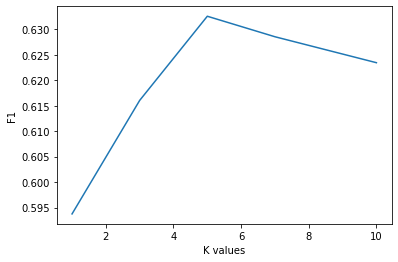

In [27]:
precision_32 = []
recall_32 = []
f1_32 = []
for i in range(0, len(k_array)):
    print("for k = ",k_array[i])
    print('accuracy = ', accuracy_32[i]*100, '%')
    print("Confusion Matrix:\n", confusion_mat_32[i])
    row_val = 0
    row_precision = 0
    for row in confusion_mat_32[i]:
        row_precision += row[row_val]/row.sum()
        row_val +=1
    k_precision = row_precision/len(all_outputs)
    precision_32.append(k_precision)
    print("Precision:", k_precision)
    temp_matrix = confusion_mat_32[i].T
    row_val = 0
    row_recall = 0
    for row in temp_matrix:
        row_recall += row[row_val]/row.sum()
        row_val +=1
    k_recall = row_recall/len(all_outputs)
    recall_32.append(k_recall)
    print("Recall:", k_recall)
    k_f1 = (2*k_recall*k_precision)/(k_recall+k_precision) 
    f1_32.append(k_f1)
    print("F1:", k_f1,"\n")
for i in range(0,len(accuracy)):
    accuracy_32[i] = accuracy_32[i]*100
plt.plot(k_array,accuracy_32)
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.show()
plt.plot(k_array,precision_32)
plt.xlabel('K values')
plt.ylabel('Precision')
plt.show()
plt.plot(k_array,recall_32)
plt.xlabel('K values')
plt.ylabel('Recall')
plt.show()
plt.plot(k_array,f1_32)
plt.xlabel('K values')
plt.ylabel('F1')
plt.show()